In [1]:
!pip install pandas matplotlib seaborn scikit-learn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 7.2 MB/s  0:00:01eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 8.7 MB/s  0:00:00m0:00:0100:01
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 8.0 MB/s  0:00:01eta 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 9.9 MB/s  0:00:00 eta 0:00:01
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 10.9 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 10.8 MB/s  0:00:00 eta 0:00:01
Using cached pytz-2025.2-py2.py3-none-any.whl (5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from itertools import combinations
import warnings
warnings.filterwarnings("ignore")

SEED = 42
np.random.seed(SEED)

colors = cm.Set2.colors


In [96]:
df = pd.read_csv('data/train.csv')

## Data Exploratory Analysis

### A general data overview

In [ ]:
df.shape # (rows, columns)

(2154048, 19)

In [11]:
df.info() # Summary of the dataframe types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


In [12]:
df.describe() # Statistical summary of numerical columns

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,1.397309e+06,1.397309e+06,1.428000e+06,1.428000e+06,1.428000e+06,1.093615e+06,1.367373e+06,1.258800e+06,864032.000000,169721.000000,136824.000000,2.154048e+06,1.251454e+06,2.154048e+06
mean,5.532117e+03,1.152912e+01,5.510810e+03,1.836943e+03,1.397814e+01,3.366450e+03,2.776891e+02,9.541871e+01,23.109253,8.170132,7.553309,2.804251e+01,9.272461e+00,1.875474e-01
std,7.111339e+03,1.327407e+01,7.187113e+03,2.395700e+03,1.469403e+01,1.330446e+04,8.726889e+02,2.049873e+02,63.578086,41.169511,33.487234,2.228686e+01,1.228044e+01,3.903504e-01
min,1.000000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+03,2.000000e+00,1.000000e+03,3.330000e+02,3.000000e+00,0.000000e+00,5.000000e+00,7.000000e+00,2.000000,0.000000,0.000000,6.000000e+00,2.000000e+00,0.000000e+00
50%,3.000000e+03,7.000000e+00,3.000000e+03,1.000000e+03,9.000000e+00,2.570000e+02,2.700000e+01,2.900000e+01,6.000000,1.000000,2.000000,2.400000e+01,5.000000e+00,0.000000e+00
75%,7.350000e+03,1.600000e+01,7.368000e+03,2.456000e+03,2.000000e+01,2.895000e+03,1.560000e+02,9.900000e+01,20.000000,3.000000,5.000000,5.100000e+01,1.200000e+01,0.000000e+00
max,4.700000e+05,1.330000e+02,5.321770e+05,1.773920e+05,9.100000e+01,1.823866e+06,5.080900e+04,2.132300e+04,4174.000000,4792.000000,3697.000000,6.200000e+01,7.130000e+02,1.000000e+00


In [14]:
df.head() # Display the first few rows of the dataframe

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


### Check missing values

In [36]:
df.isnull().sum() * 100 / len(df) # Percentage of missing values per column

user_id            0.000000
REGION            39.428044
TENURE             0.000000
MONTANT           35.131018
FREQUENCE_RECH    35.131018
REVENUE           33.706213
ARPU_SEGMENT      33.706213
FREQUENCE         33.706213
DATA_VOLUME       49.229776
ON_NET            36.520774
ORANGE            41.561191
TIGO              59.887988
ZONE1             92.120835
ZONE2             93.648052
MRG                0.000000
REGULARITY         0.000000
TOP_PACK          41.902223
FREQ_TOP_PACK     41.902223
CHURN              0.000000
dtype: float64

Several features contain a huge of missing data. Notably:
- ``ZONE1`` (92.12%) and ``ZONE2`` (93.65%) have high missingness, making them unreliable for predictive modeling.
- ``TIGO`` (60%), ``REGION`` (39%), ``ORANGE`` (42%), ``TOP_PACK`` (42%), and ``FREQ_TOP_PACK`` (42%) also have moderate missing values, which will require careful imputation or alternative handling.
- Other features, such as ``MONTANT``, ``FREQUENCE_RECH``, ``REVENUE``, ``ARPU_SEGMENT``, ``FREQUENCE``, ``DATA_VOLUME``, ``ON_NET``, have between 33% and 49% missing values, which may still be informative if handled correctly.
- No missing values for ``user_id``, ``TENURE``, ``MRG``, ``REGULARITY``, ``CHURN``.

<Axes: title={'center': 'Percentage of Missing Values per Column'}>

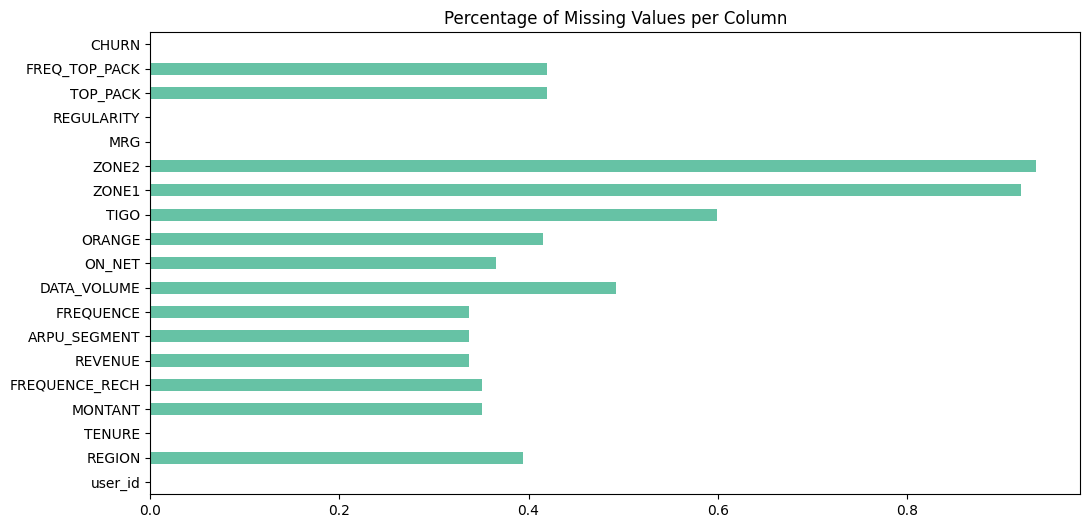

In [46]:
df.isnull().mean().plot.barh(figsize=(12, 6), title='Percentage of Missing Values per Column', color=colors[0])

### Target variable ['``CHURN``']

In [24]:
df['CHURN'].value_counts() # Check the distribution of the target variable

CHURN
0    1750062
1     403986
Name: count, dtype: int64

Text(0.5, 1.02, 'Distribution of CHURN')

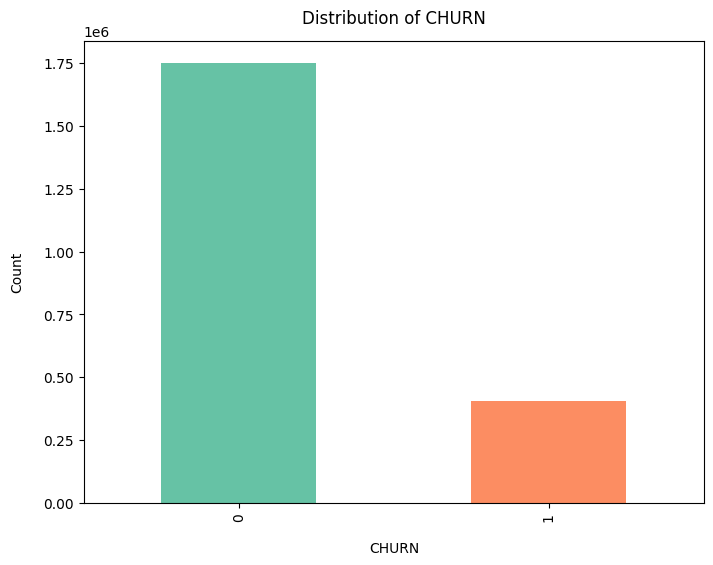

In [49]:
df['CHURN'].value_counts().plot(kind='bar', figsize=(8,6), color=(colors[0], colors[1]))
plt.xlabel('CHURN', labelpad=14)
plt.ylabel('Count', labelpad=14)
plt.title('Distribution of CHURN', y=1.02)

The dataset is imbalanced.

### Explore categorical variables

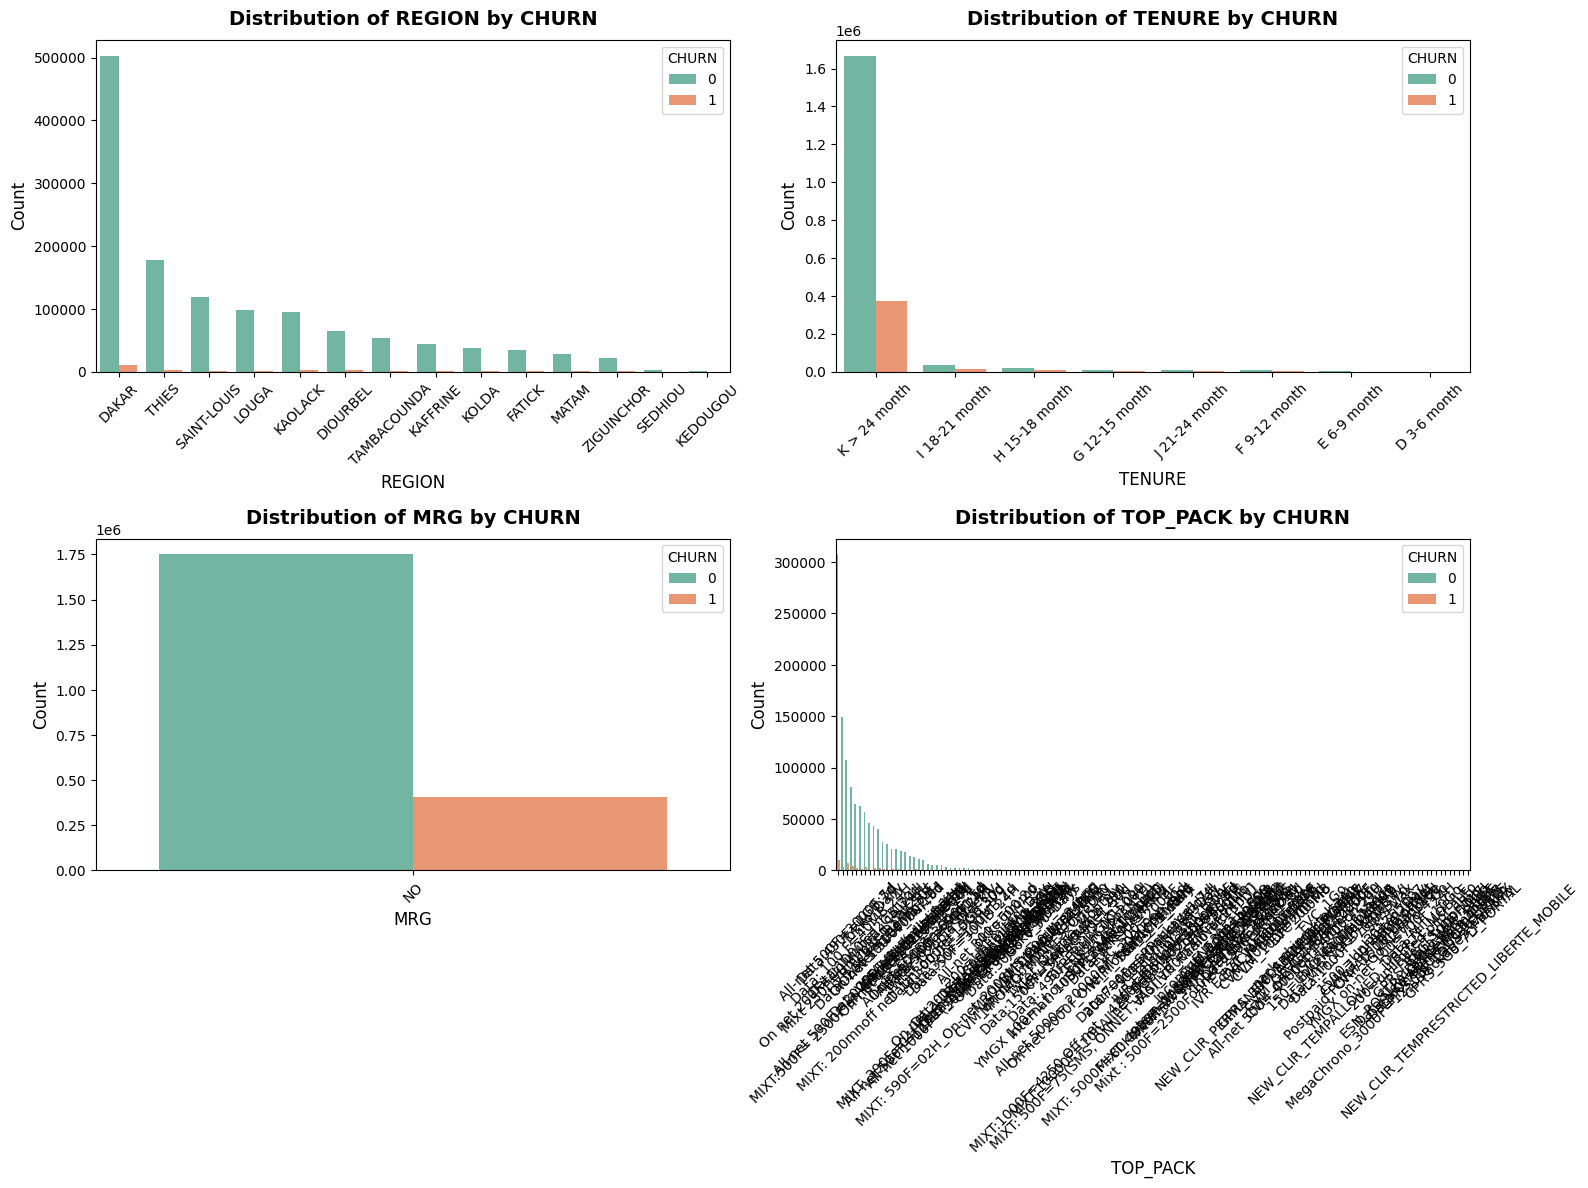

In [ ]:
cat_features = ['REGION', 'TENURE', 'MRG', 'TOP_PACK']

fig, axes = plt.subplots(2, 2, figsize=(16,12))
axes = axes.flatten()

for i, col in enumerate(cat_features):
    sns.countplot(data=df, x=col, hue='CHURN', ax=axes[i], 
                  order=df[col].value_counts().index, palette='Set2')
    axes[i].set_title(f'Distribution of {col} by CHURN', y=1.02, fontsize=14, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()

``MRG`` feature all its values are 'NO'.

## Explore numeric variables

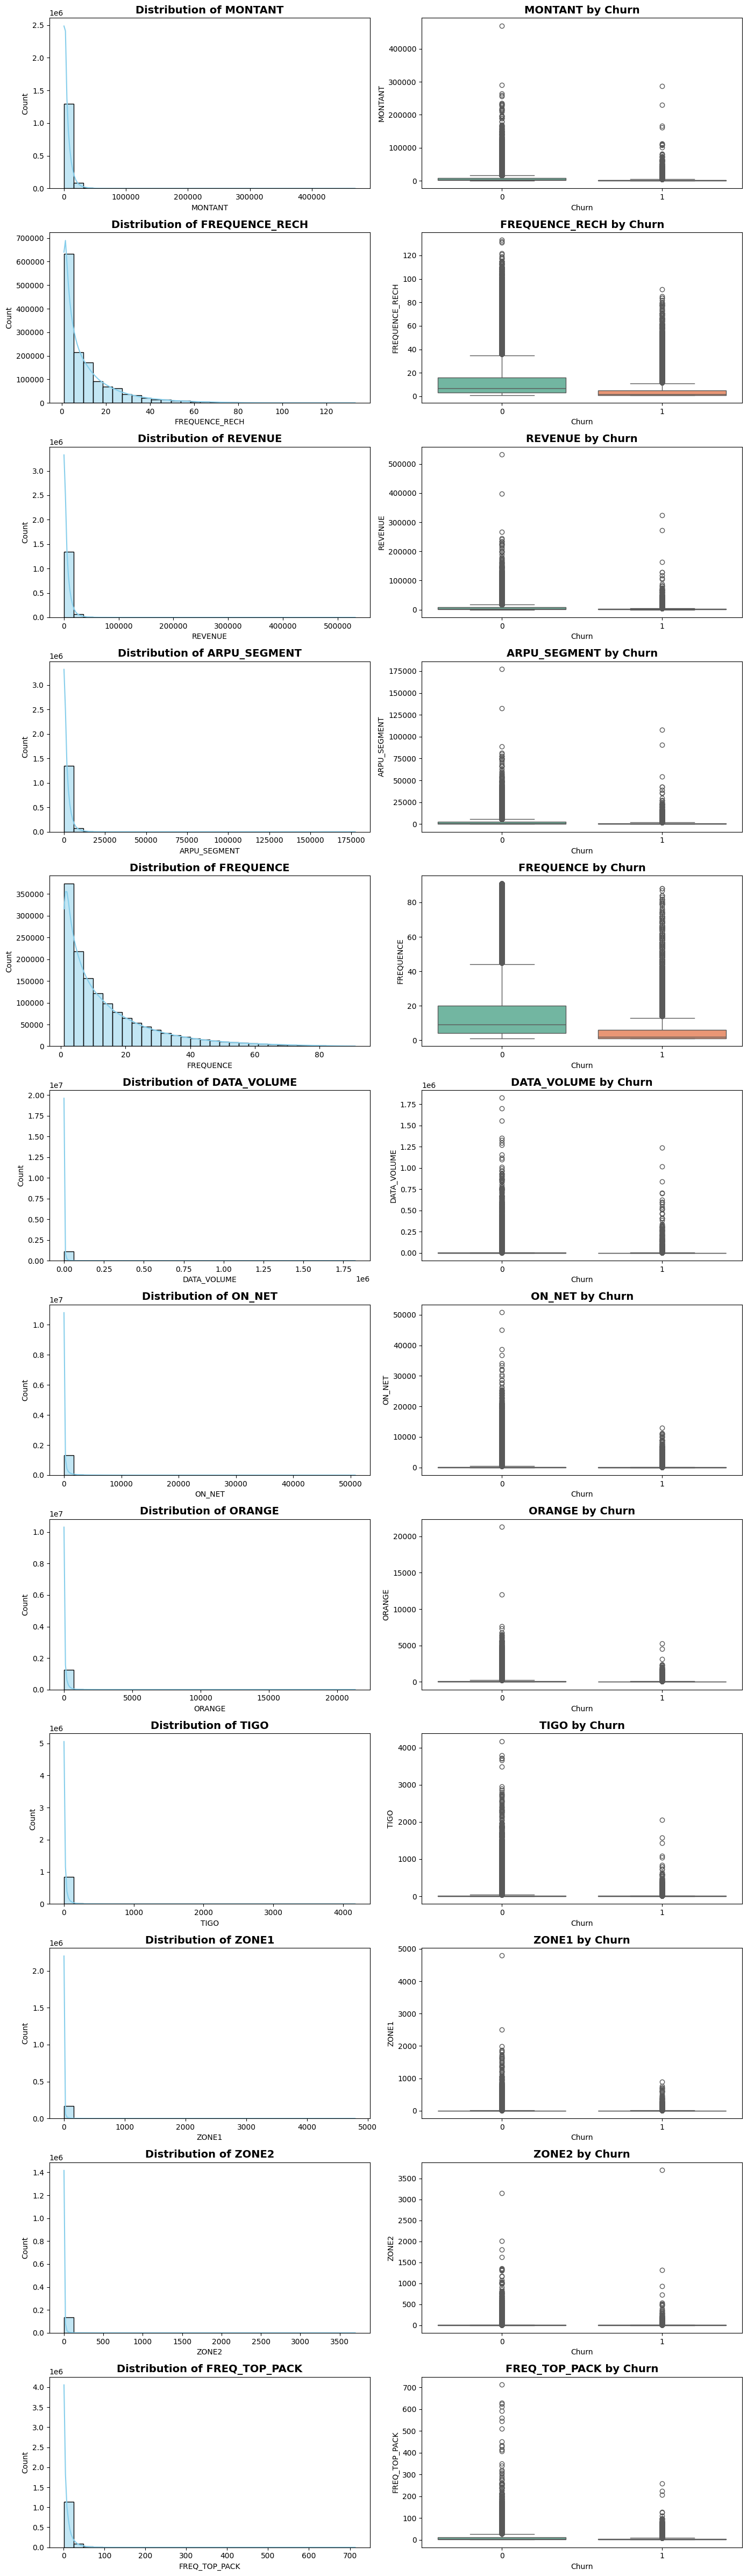

In [ ]:
num_features = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT','FREQUENCE', 
                'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO','ZONE1', 'ZONE2', 'FREQ_TOP_PACK']

fig, axes = plt.subplots(len(num_features), 2, figsize=(14, 4 * len(num_features)))

for i, col in enumerate(num_features):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i, 0], color="skyblue")
    axes[i, 0].set_title(f"Distribution of {col}", fontsize=14, fontweight='bold')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel("Count")

    sns.boxplot(x="CHURN", y=col, data=df, ax=axes[i, 1], palette="Set2")
    axes[i, 1].set_title(f"{col} by Churn", fontsize=14, fontweight='bold')
    axes[i, 1].set_xlabel("Churn")
    axes[i, 1].set_ylabel(col)

plt.tight_layout()
plt.show()

### Pairwise scatterplots

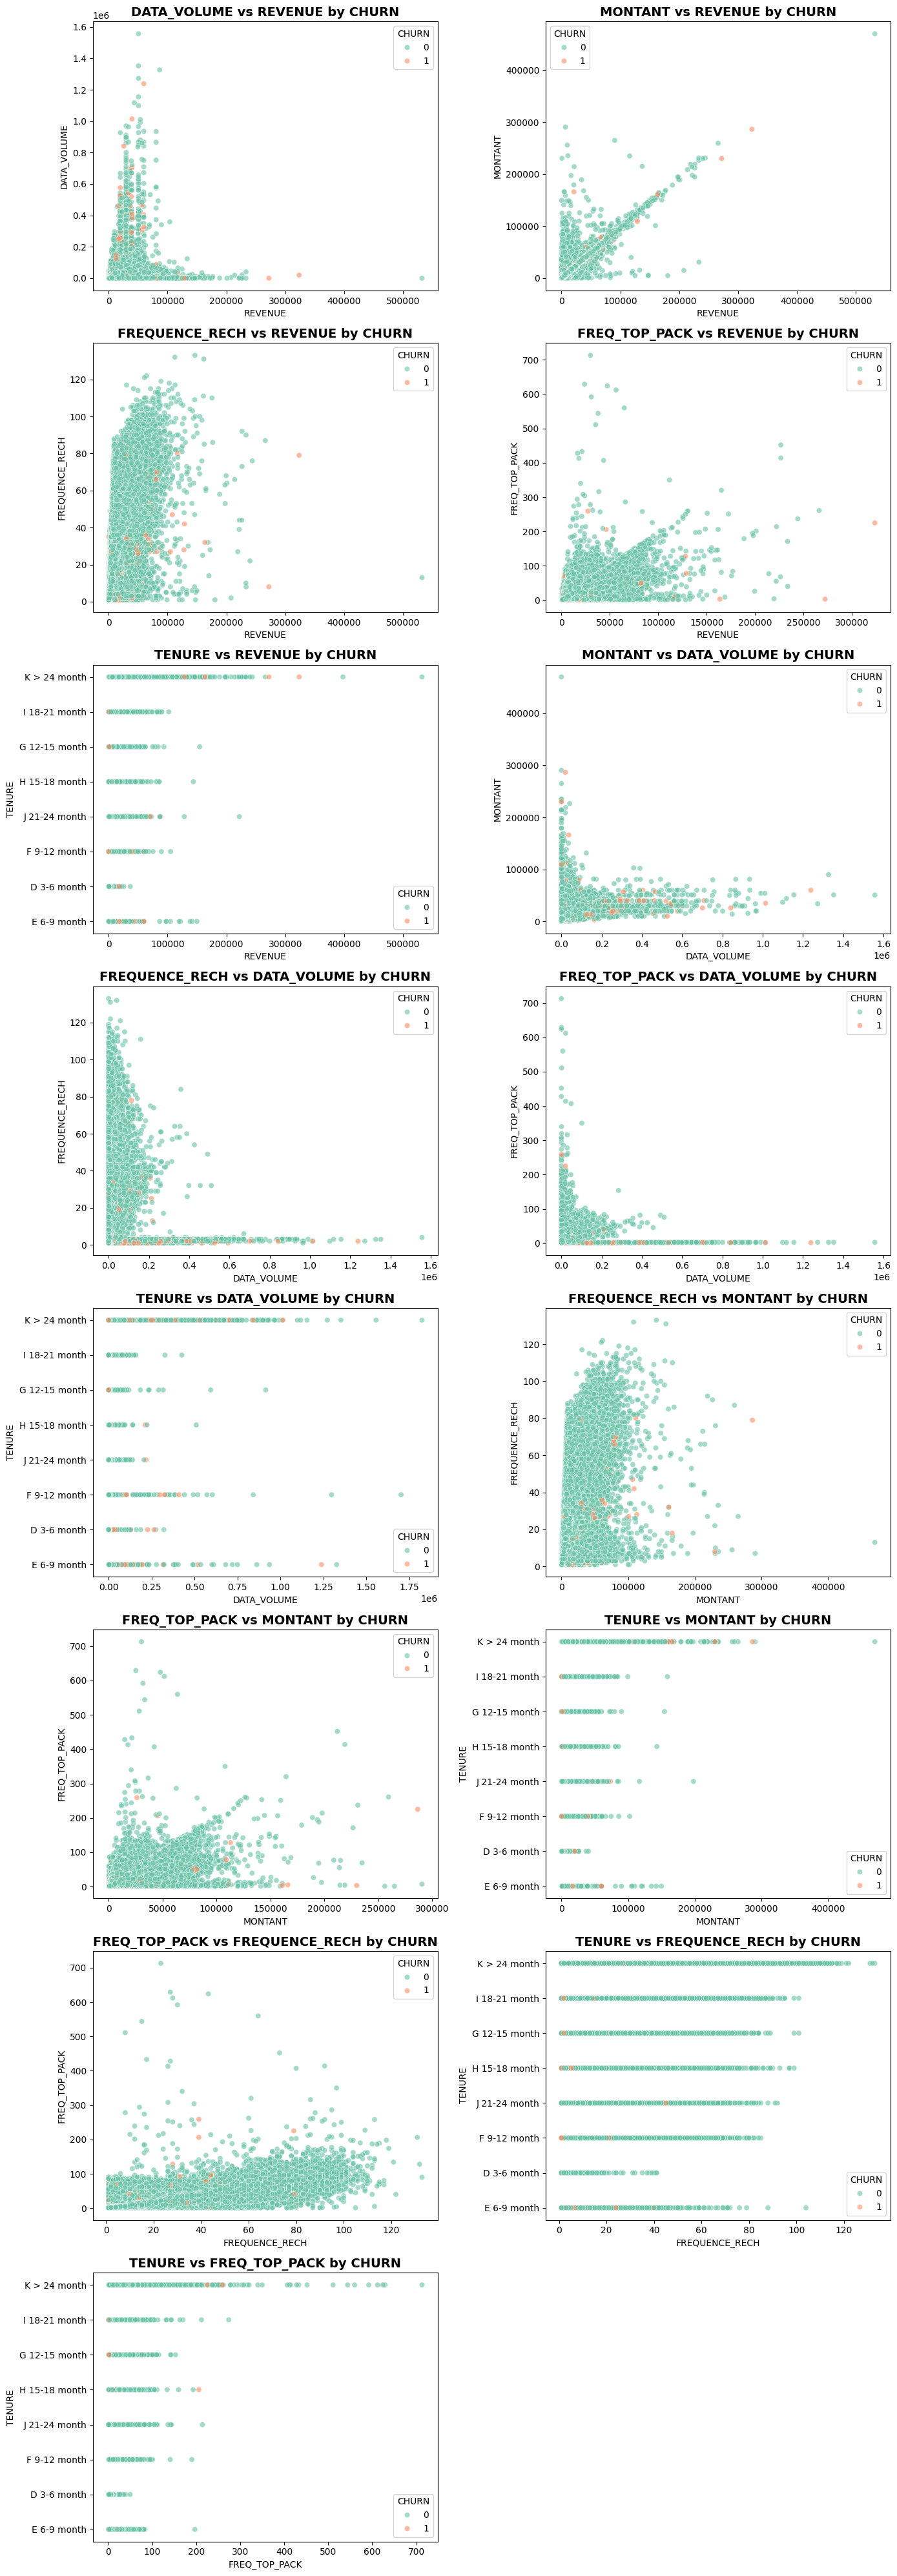

In [72]:
key_features = ['REVENUE', 'DATA_VOLUME', 'MONTANT', 'FREQUENCE_RECH', 'FREQ_TOP_PACK', 'TENURE']


pairs = list(combinations(key_features, 2))
n_rows = len(pairs) // 2 + len(pairs) % 2
fig, axes = plt.subplots(n_rows, 2, figsize=(14, 5*n_rows))
axes = axes.flatten()

for i, (x, y) in enumerate(pairs):
    sns.scatterplot(
        x=x, y=y, hue='CHURN', data=df,
        ax=axes[i], palette='Set2', alpha=0.6
    )
    axes[i].set_title(f"{y} vs {x} by CHURN", fontsize=14, fontweight='bold')
    axes[i].legend(title='CHURN')

if len(pairs) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


## Correlation heatmap

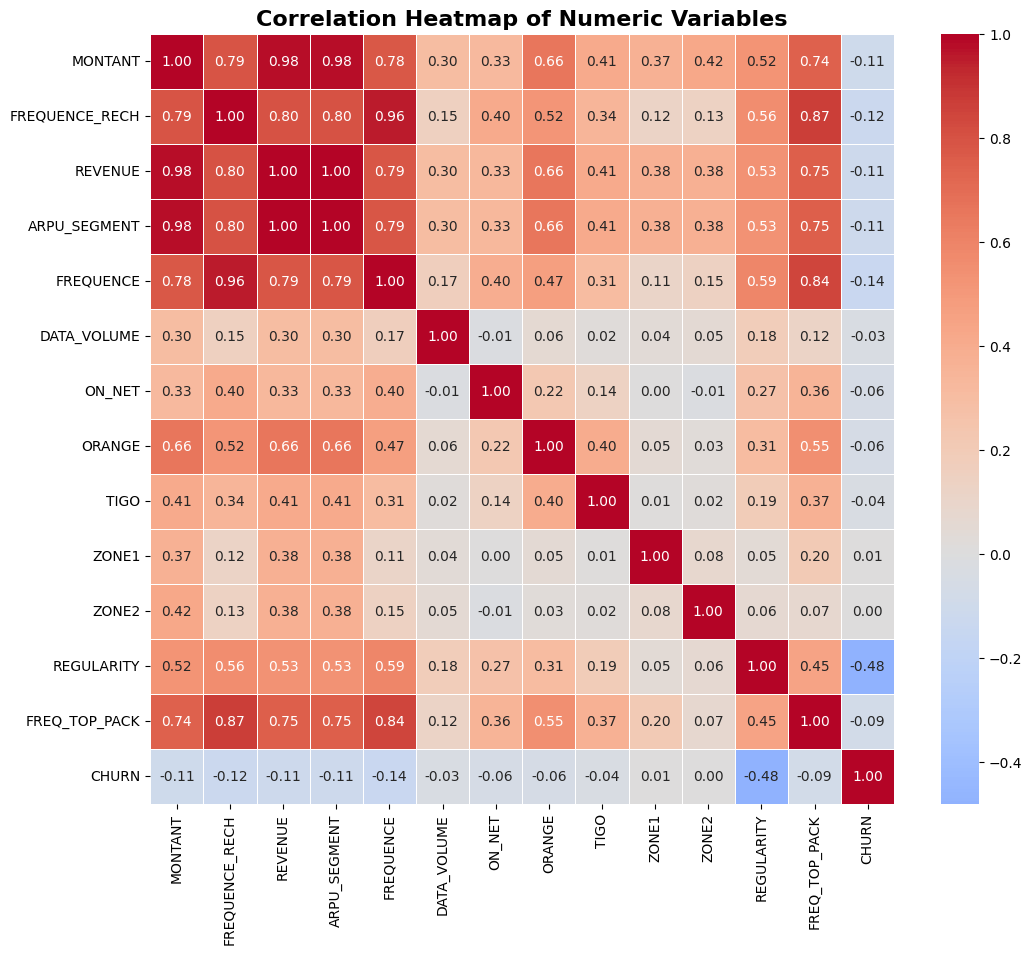

In [107]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap of Numeric Variables", fontsize=16, fontweight='bold')
plt.show()